# start

In [1]:
PRFX = 'MelEDA0705A1'
PRFX_PREP = 'MelPrp0630C1'

# setup

In [47]:
import albumentations as A
from albumentations import pytorch as AT


from pathlib import Path
import pickle
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader

from torchvision import transforms
from PIL import Image
import cv2


def augment_and_show(aug, img):
    img = aug(image=img)['image']
    plt.imshow(img)
    plt.show()

def get_img(fnm):
    img = cv2.imread(fnm)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [4]:
p_cmp = '../input/siim-isic-melanoma-classification/'
p_prp = f'../output/{PRFX_PREP}'
dftrn = pd.read_csv(f'{p_prp}/train_all.csv') 
dftst = pd.read_csv(f'{p_prp}/test.csv')

../output/MelPrp0630C1/siim-isic-melanoma-classification/jpeg/train/ISIC_2968532.jpg


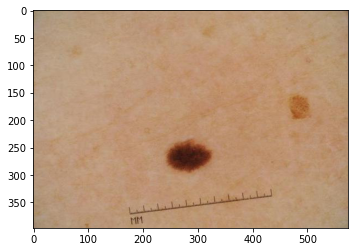

(574, 397)


tensor([[[ 0.2796,  0.3823,  0.5193,  ...,  0.3481,  0.2967,  0.3138],
         [ 0.3823,  0.4508,  0.5364,  ...,  0.4166,  0.3481,  0.3309],
         [ 0.4851,  0.5022,  0.5364,  ...,  0.4679,  0.3823,  0.2967],
         ...,
         [ 0.5536,  0.5878,  0.6049,  ...,  0.5878,  0.5364,  0.4851],
         [ 0.5022,  0.5364,  0.5536,  ...,  0.5878,  0.5193,  0.4679],
         [ 0.4508,  0.4851,  0.5364,  ...,  0.5707,  0.5193,  0.4679]],

        [[ 0.0651,  0.1702,  0.3102,  ..., -0.0399, -0.1099, -0.0924],
         [ 0.1702,  0.2402,  0.3277,  ...,  0.0301, -0.0574, -0.0749],
         [ 0.2752,  0.2927,  0.3277,  ...,  0.0826, -0.0224, -0.1099],
         ...,
         [ 0.2577,  0.2927,  0.3102,  ...,  0.4328,  0.3803,  0.3277],
         [ 0.2052,  0.2402,  0.2577,  ...,  0.4328,  0.3627,  0.3102],
         [ 0.1527,  0.1877,  0.2402,  ...,  0.3978,  0.3452,  0.2927]],

        [[-0.1835, -0.0790,  0.0605,  ..., -0.2358, -0.2358, -0.1835],
         [-0.0790, -0.0092,  0.0779,  ..., -0

(tensor(0.6122), tensor(0.4339))

In [54]:
fnm = np.random.choice(dftrn.im_pth)
print(fnm)
x = Image.open(fnm)
plt.imshow(x);
plt.show()
print(x.size)

x = transforms.ToTensor()(x)

x = transforms.Normalize(mean=(0.485, 0.456, 0.406),
                     std=(0.229, 0.224, 0.225),)(x)
display(x)
x.mean(), x.std()

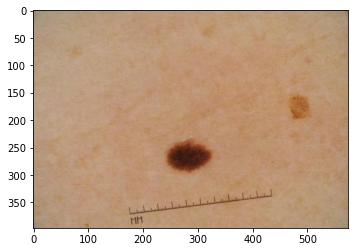

(397, 574, 3)


tensor([[[ 0.2796,  0.3823,  0.4851,  ...,  0.3481,  0.2967,  0.3138],
         [ 0.3823,  0.4508,  0.5022,  ...,  0.4166,  0.3481,  0.3309],
         [ 0.4851,  0.5022,  0.5022,  ...,  0.4679,  0.3823,  0.2967],
         ...,
         [ 0.5536,  0.5878,  0.6049,  ...,  0.5878,  0.5364,  0.4851],
         [ 0.5022,  0.5364,  0.5536,  ...,  0.5878,  0.5193,  0.4679],
         [ 0.4508,  0.4851,  0.5364,  ...,  0.5707,  0.5193,  0.4679]],

        [[ 0.0651,  0.1702,  0.3277,  ..., -0.0399, -0.1099, -0.0924],
         [ 0.1702,  0.2402,  0.3452,  ...,  0.0301, -0.0574, -0.0749],
         [ 0.2752,  0.2927,  0.3452,  ...,  0.0826, -0.0224, -0.1099],
         ...,
         [ 0.2577,  0.2927,  0.3277,  ...,  0.4328,  0.3803,  0.3277],
         [ 0.2052,  0.2402,  0.2752,  ...,  0.4328,  0.3627,  0.3102],
         [ 0.1527,  0.1877,  0.2577,  ...,  0.4153,  0.3452,  0.3102]],

        [[-0.1835, -0.0790,  0.0605,  ..., -0.2358, -0.2358, -0.2184],
         [-0.0790, -0.0092,  0.0779,  ..., -0

(tensor(0.6122), tensor(0.4338))

In [55]:
def get_img(fnm):
    img = cv2.imread(fnm)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

x = get_img(fnm)
plt.imshow(x);
plt.show()
print(x.shape)


x = A.Normalize()(image=x)['image']
x = AT.ToTensor()(image=x)['image']
display(x)
x.mean(), x.std()

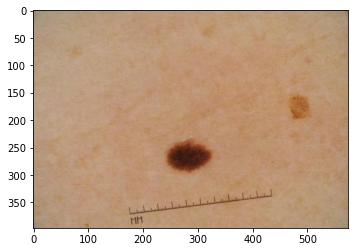

(397, 574, 3)


tensor([[[ 0.2796,  0.3823,  0.4851,  ...,  0.3481,  0.2967,  0.3138],
         [ 0.3823,  0.4508,  0.5022,  ...,  0.4166,  0.3481,  0.3309],
         [ 0.4851,  0.5022,  0.5022,  ...,  0.4679,  0.3823,  0.2967],
         ...,
         [ 0.5536,  0.5878,  0.6049,  ...,  0.5878,  0.5364,  0.4851],
         [ 0.5022,  0.5364,  0.5536,  ...,  0.5878,  0.5193,  0.4679],
         [ 0.4508,  0.4851,  0.5364,  ...,  0.5707,  0.5193,  0.4679]],

        [[ 0.0651,  0.1702,  0.3277,  ..., -0.0399, -0.1099, -0.0924],
         [ 0.1702,  0.2402,  0.3452,  ...,  0.0301, -0.0574, -0.0749],
         [ 0.2752,  0.2927,  0.3452,  ...,  0.0826, -0.0224, -0.1099],
         ...,
         [ 0.2577,  0.2927,  0.3277,  ...,  0.4328,  0.3803,  0.3277],
         [ 0.2052,  0.2402,  0.2752,  ...,  0.4328,  0.3627,  0.3102],
         [ 0.1527,  0.1877,  0.2577,  ...,  0.4153,  0.3452,  0.3102]],

        [[-0.1835, -0.0790,  0.0605,  ..., -0.2358, -0.2358, -0.2184],
         [-0.0790, -0.0092,  0.0779,  ..., -0

(tensor(0.6122), tensor(0.4338))

In [58]:
x = get_img(fnm)
plt.imshow(x);
plt.show()
print(x.shape)


x = A.Compose([A.Normalize(), AT.ToTensor()])(image=x)['image']
display(x)
x.mean(), x.std()